# Movie Recommendation System

In [170]:
from scipy.io import loadmat
from scipy.optimize import fmin_cg
import numpy as np

In [171]:
# Defining cost function
def cost_func(p, Y, R, alpha):
    m, u = Y.shape
    n = int(p.size / float(m + u))
    X = np.resize(p[:m * n], (m, n))
    Theta = np.resize(p[m * n:], (u, n))

    J = 1 / 2. * np.sum(np.multiply(np.power(np.dot(X, Theta.T) - Y, 2), R))
    J += alpha / 2. * (np.sum(np.power(Theta, 2)) + np.sum(np.power(X, 2)))

    return J


def gradient_descent(p, Y, R, alpha):
    m, u = Y.shape
    n = int(p.size / float(m + u))
    X = np.resize(p[:m * n], (m, n))
    Theta = np.resize(p[m * n:], (u, n))

    X_grad = np.dot(np.multiply((np.dot(X, Theta.T) - Y), R), Theta) + alpha * X
    Theta_grad = np.dot(np.multiply((np.dot(X, Theta.T) - Y).T, R.T), X) + alpha * Theta

    return np.ravel(np.vstack((X_grad, Theta_grad)))


def fit(Y, R, alpha, n):
    m, u = Y.shape
    p = np.random.normal(0,1, (m + u) * n)
    #p = np.random.random((m + u) * n)

    # minimize cost function
    costf = lambda x: cost_func(x, Y, R, alpha)
    gradf = lambda x: gradient_descent(x, Y, R, alpha)
    p = fmin_cg(costf, p, fprime=gradf, maxiter=300, disp=True)

    # unroll parameters
    X = np.resize(p[:m * n], (m, n))
    Theta = np.resize(p[m * n:], (u, n))

    return (X, Theta)


def predict(X, T):
    return np.dot(X, T.T)


def normalizeRatings(Y, R):
    m, n = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)
    for i in range(0, m):
        # fetches index positions indicating the users who rated the movie
        idx = np.nonzero(R[i,:])
        # Mean of a movie across all users
        Ymean[i] = np.mean(Y[i,idx])
        Ynorm[i,idx] = Y[i,idx] - Ymean[i]
    return (Ynorm, Ymean) 

In [172]:
''' alpha = regularization parameter
    n = number of features
'''

alpha = 15
n = 10
D = loadmat('ex8_movies.mat')
Y, R = (D['Y'], D['R'])

f = open('movie_ids.txt', 'r', encoding = "ISO-8859-1")
movies = np.array([str.strip(l.partition(' ')[-1]) for l in f])

In [173]:
# Add sample ratings for new user
my_ratings = np.zeros(1682)
my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11] = 5
my_ratings[53] = 4;
my_ratings[63]= 5;
my_ratings[65]= 3;
my_ratings[68] = 5;
my_ratings[182] = 4;
my_ratings[225] = 5;
my_ratings[354]= 5;

#  Add the above sample ratings to the data matrix
Y = np.concatenate((my_ratings.reshape(np.size(my_ratings),1), Y), axis = 1)
R = np.concatenate(((my_ratings != 0).reshape(np.size(my_ratings),1),R), axis = 1)

In [174]:
#  Normalize ratings
(Ynorm, Ymean) = normalizeRatings(Y, R)

In [175]:
# Training the model
X, Theta = fit(Ynorm, R, alpha, n)

         Current function value: 42506.095615
         Iterations: 300
         Function evaluations: 461
         Gradient evaluations: 461


In [176]:
val = predict(X, Theta)

my_predictions = val[:,0] + Ymean;

sorted_predictions= np.argsort(my_predictions)

print ('Top recommendations for you:')
for i in range(1, 21):
    print ('Predicting rating ', '%.2f' % my_predictions[sorted_predictions[-i]], 'for movie ', movies[sorted_predictions[-i]])

print()
print ('Original ratings provided:')
for i in range(0, my_ratings.size):
    if my_ratings[i] > 0:
        print ('Rated ', '%d' % my_ratings[i], 'for ', movies[i])

Top recommendations for you:
Predicting rating  5.00 for movie  Someone Else's America (1995)
Predicting rating  5.00 for movie  Aiqing wansui (1994)
Predicting rating  5.00 for movie  Prefontaine (1997)
Predicting rating  5.00 for movie  Santa with Muscles (1996)
Predicting rating  5.00 for movie  Saint of Fort Washington, The (1993)
Predicting rating  5.00 for movie  They Made Me a Criminal (1939)
Predicting rating  5.00 for movie  Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating  5.00 for movie  Star Kid (1997)
Predicting rating  5.00 for movie  Marlene Dietrich: Shadow and Light (1996)
Predicting rating  5.00 for movie  Great Day in Harlem, A (1994)
Predicting rating  4.63 for movie  Pather Panchali (1955)
Predicting rating  4.53 for movie  Star Wars (1977)
Predicting rating  4.52 for movie  Shawshank Redemption, The (1994)
Predicting rating  4.51 for movie  Maya Lin: A Strong Clear Vision (1994)
Predicting rating  4.50 for movie  Anna (1996)
Predicting rating  4

In [24]:
idx = np.nonzero(R[0,:])
ground_truth = Y[idx]

In [26]:
ground_truth.shape

(453, 944)

In [23]:
movies_count , user_count = Y.shape

In [22]:
for i in range(0,movies_count ):
        # fetches index positions indicating the users who rated the movie
        idx = np.nonzero(R[i,:])
        # Mean of a movie across all users
        Ymean[i] = np.mean(Y[i,idx])
        Ynorm[i,idx] = Y[i,idx] - Ymean[i]
    return (Ynorm, Ymean) 

array([[ 4.,  5.,  4., ...,  5.,  0.,  0.],
       [ 0.,  3.,  0., ...,  0.,  0.,  5.],
       [ 0.,  4.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [150]:
val_add_mean = np.zeros(val.shape)
for i in range(0,943):
    val_add_mean[:,i] = val[:,i] + Ymean

y_flatten = Y.flatten()
pred_flatten = val_add_mean.flatten()

In [151]:
idx = np.flatnonzero(y_flatten)
groundtruth = y_flatten[idx]
predicted = pred_flatten[idx]

In [152]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [153]:
sqrt(mean_squared_error(predicted, groundtruth))

0.8209245015289748

In [154]:
from matplotlib import pyplot as py
%matplotlib inline

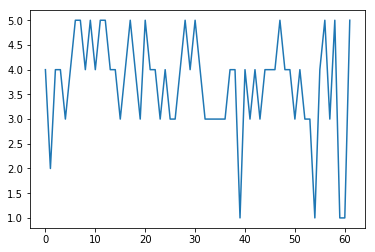

In [167]:
idx = np.nonzero(R[:,1])
to_plot = Y[idx, 1]
py.plot(to_plot.T)
py.show()

In [166]:
to_plot.shape

(1, 62)

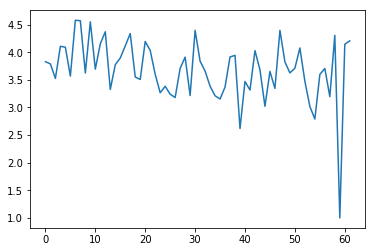

In [169]:
py.plot(val_add_mean[idx,1].T)
py.show()

In [180]:
mean_rating = np.zeros(movies_count)
for i in range(0,movies_count ):
    mean_rating[i] = np.mean(val_add_mean[i,:])

sorted_rating = np.sort(mean_rating)
for i in range(0,movies_count ):
print("Mean rating of movie {} is {}".format(movies[i], sorted_rating[-i]))
    

Mean rating of movie Toy Story (1995) is 3.8687739773005787
Mean rating of movie GoldenEye (1995) is 3.195454761078127
Mean rating of movie Four Rooms (1995) is 3.0164643755499227
Mean rating of movie Get Shorty (1995) is 3.5387827152107056
Mean rating of movie Copycat (1995) is 3.293512548580564
Mean rating of movie Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) is 3.572135334899087
Mean rating of movie Twelve Monkeys (1995) is 3.7804502915883447
Mean rating of movie Babe (1995) is 3.9894354234805074
Mean rating of movie Dead Man Walking (1995) is 3.8865169610552788
Mean rating of movie Richard III (1995) is 3.8256341014361865
Mean rating of movie Seven (Se7en) (1995) is 3.833432195634532
Mean rating of movie Usual Suspects, The (1995) is 4.377178371810016
Mean rating of movie Mighty Aphrodite (1995) is 3.4066636144768467
Mean rating of movie Postino, Il (1994) is 3.9643696998229196
Mean rating of movie Mr. Holland's Opus (1995) is 3.767199209366425
Mean rating of movie French T

Mean rating of movie Washington Square (1997) is 3.291975296274921
Mean rating of movie Telling Lies in America (1997) is 3.231362809401714
Mean rating of movie Year of the Horse (1997) is 3.285475594672397
Mean rating of movie Phantoms (1998) is 2.229060566010752
Mean rating of movie Life Less Ordinary, A (1997) is 3.066787428384294
Mean rating of movie Eve's Bayou (1997) is 3.60544649724844
Mean rating of movie One Night Stand (1997) is 3.4643064403864683
Mean rating of movie Tango Lesson, The (1997) is 3.3846948421710747
Mean rating of movie Mortal Kombat: Annihilation (1997) is 1.9416188362870372
Mean rating of movie Bent (1997) is 2.665564237651374
Mean rating of movie Flubber (1997) is 2.7499976318243937
Mean rating of movie For Richer or Poorer (1997) is 2.4306491394081124
Mean rating of movie Home Alone 3 (1997) is 1.8871208857053072
Mean rating of movie Scream 2 (1997) is 3.2039548744795376
Mean rating of movie Sweet Hereafter, The (1997) is 3.7722318722567683
Mean rating of m

In [182]:
# Predicted Success at Box office
ranks, ids = zip(*sorted(zip(mean_rating, range(len(mean_rating))), reverse=True))
for i in range(movies_count):
    print ('Predicting rating %.2f for movie %s' % (ranks[i], movies[ids[i]]))

Predicting rating 5.00 for movie They Made Me a Criminal (1939)
Predicting rating 5.00 for movie Prefontaine (1997)
Predicting rating 5.00 for movie Star Kid (1997)
Predicting rating 5.00 for movie Marlene Dietrich: Shadow and Light (1996)
Predicting rating 5.00 for movie Entertaining Angels: The Dorothy Day Story (1996)
Predicting rating 5.00 for movie Someone Else's America (1995)
Predicting rating 5.00 for movie Saint of Fort Washington, The (1993)
Predicting rating 5.00 for movie Great Day in Harlem, A (1994)
Predicting rating 5.00 for movie Aiqing wansui (1994)
Predicting rating 5.00 for movie Santa with Muscles (1996)
Predicting rating 4.62 for movie Pather Panchali (1955)
Predicting rating 4.50 for movie Everest (1998)
Predicting rating 4.50 for movie Anna (1996)
Predicting rating 4.50 for movie Some Mother's Son (1996)
Predicting rating 4.50 for movie Maya Lin: A Strong Clear Vision (1994)
Predicting rating 4.49 for movie Close Shave, A (1995)
Predicting rating 4.46 for movie S

Predicting rating 3.14 for movie Dream With the Fishes (1997)
Predicting rating 3.14 for movie Wild Reeds (1994)
Predicting rating 3.14 for movie Fallen (1998)
Predicting rating 3.14 for movie Demolition Man (1993)
Predicting rating 3.14 for movie Just Cause (1995)
Predicting rating 3.14 for movie Ayn Rand: A Sense of Life (1997)
Predicting rating 3.14 for movie Jack (1996)
Predicting rating 3.13 for movie River Wild, The (1994)
Predicting rating 3.13 for movie Princess Caraboo (1994)
Predicting rating 3.13 for movie Bye Bye, Love (1995)
Predicting rating 3.13 for movie Inventing the Abbotts (1997)
Predicting rating 3.13 for movie City Hall (1996)
Predicting rating 3.13 for movie Ruby in Paradise (1993)
Predicting rating 3.13 for movie Stargate (1994)
Predicting rating 3.13 for movie Lost Highway (1997)
Predicting rating 3.13 for movie Love and a .45 (1994)
Predicting rating 3.12 for movie Aristocats, The (1970)
Predicting rating 3.12 for movie Full Speed (1996)
Predicting rating 3.12 

In [206]:
import pandas as pd
cols = ['Movie Name']
df = pd.DataFrame(movies,columns=cols)

In [207]:
df['Average_Rating'] = mean_rating

pandas.core.series.Series

In [277]:
# predicts whether movie will be hit or not
def predict_movie_success(movie_name):
    s = df['Movie Name']
    t = df[s.str.match(movie_name)]
    if t.size > 0:
        if (t.values)[0][1] >= 3:
            print("Hit")
        else:
            print('Oops! Flop!')
    else:
        print("No data to predict success or failure")

In [278]:
predict_movie_success('immy Hollywoo')

No data to predict success or failure
